<a href="https://colab.research.google.com/github/Super1305/Claissic-Machine-Learning/blob/main/log_regression_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bit.ly/FEML-2-CLS

## Классификация. Логистическая регрессия и SVM

<p style="align: center;"><img align=center src="https://sun9-3.userapi.com/impg/rMxsV1l3x_NgXZnO2BR_Z_vQ5CMfAysGMkpVrg/5vII3kSwywk.jpg?size=1233x403&quality=96&proxy=1&sign=607ece16ae211ad91d8c9a1ba285c822&type=album"  width=900></p>
<div class="alert alert-info">
    <h2>Некоторые важные определения</h2>
<ul>
 <li><b>Классификация</b> - задача о разделении классов, по заданному набору признаков.</li>
    <li><b>Логистическая регрессия</b>  - это статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой.</li>
    <li><b>Метод опорных векторов (англ. SVM)</b>  - поиск тем или иным способом разделяющей гиперплоскости между классами.</li>
    <li><b>Сигмоида (логистическая функция)</b>  - гладкая монотонная возрастающая нелинейная функция, которая часто применяется для «сглаживания» значений некоторой величины.</li>
</ul>
</div>


<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><a href="#1"></a>
    <li><a href="#1">Логистическая регрессия</a></li>
        <ul>
            <li><a href="#2">Теория. Масимизация правдоподобия</a></li>
            <li><a href="#3">Практика. Регрессия "из коробки"</a></li>    
    </ul>
    
    
    
   

<li><a href="#4">Метод опорных векторов. SVM.</a></li>
<ul><li><a href="#5">Теория. Проблема линейной неразделимости. Ядра</a></li>
            <li><a href="#6">Практика. Задача разделения ирисов Фишера</a></li>    
    </ul>


</ul></font></p>

<h2>Логистическая регрессия</h2>

<p id="1">Рассмотрим задачу логистической регрессии. В данной задаче ключевую роль играет функция <i><b>сигмоида</b></i> (логистическая функция), которая используется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков:
   $$\sigma (z) = \frac{1}{1+e^{-z}}\text{  ,  } z \in (-\infty, +\infty) \text{  ,  } \sigma(z) \in (-1, 1)$$
<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png"  width=400></p>

Как и в задаче линейной регрессии задаем аргумент
$z=\theta^{T}x = \theta_{0} + \theta_{1}x_{1} + ... + \theta_{n}x_n$, где $\theta_{i}$ - параметры модели (веса), а $x_i$ - известные нам признаки.
<p id="2"><h3>Теория. Масимизация правдоподобия</h3>
Чтобы модель могла обучаться, ей необходимо получать "штраф" за то, что она ошибается. Подбираем такой параметр $\theta$, чтобы наша функция правдоподобия $L(\theta)$ была максимальной:
$$\hat{\theta} = argmax_{\theta}L(\theta) = argmax_{\theta} \prod\limits^{m}_{i=1}P(y=y_{i} | x = x_i)$$
</p>
После логарифмирования получаем:
$$lnL(\theta)=\sum\limits_{i=1}^mlogP(y=y_i | x=x_i) = \sum\limits_{i=1}^m y_i lnf(\theta^Tx_i) + (1-y_i)ln(1-f(\theta^Tx_i))$$
где $y_i$ - индикаторная переменная. Если предсказание верно - $y_i = 1$, то в сумме остается только первый член, а если нет, то второй.

### Практика. Регрессия "из коробки"
<p id="3">Решаем задачу о предсказании пола спортсмена.</p>

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

In [ ]:
# датасет - https://www.kaggle.com/rio2016/olympic-games
data = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
data.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

<p>Сделаем предобработку данных нашего датасета. Найдем и удалим пустые строчки нашего датасета</p>

In [ ]:
data[data['height'].isna()].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [ ]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [ ]:
# удаляем ячейки с отсутствием данных
data = data[~(data['height'].isna())]
data = data[~(data['weight'].isna())]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [ ]:
data.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

<div class="alert alert-info"><p> Далее используем популярную библиотеку <b>scikit-learn</b> для классического машинного обучения. Для дополнительного изучения всю документацию можете найти на <a href="https://scikit-learn.org/stable/">сайте</a>. Она умеет довольно неплохо решать множество задач машинного обучения, но чаще всего испольузется для обучения, а не для конкретных задач.</p></div>

In [ ]:
from sklearn.linear_model import LogisticRegression

#### <p style="align: center;">Шаг 1 Предобработка данных.


In [ ]:
# попробуем выбрать какие-нибудь признаки, для начала
selectedColumns = data[['height', 'sport', 'sex']]

In [ ]:
selectedColumns['sport'].value_counts()

athletics            2187
aquatics             1396
football              583
rowing                535
cycling               502
hockey                432
volleyball            382
shooting              380
judo                  377
sailing               372
wrestling             349
handball              349
canoe                 327
gymnastics            319
rugby sevens          296
basketball            284
weightlifting         258
fencing               245
equestrian            215
tennis                191
table tennis          168
badminton             164
archery               126
taekwondo             125
golf                  115
triathlon             109
modern pentathlon      72
Name: sport, dtype: int64

Типы данных https://youtu.be/c4Cg3TUIH0E


 Для работы с переменными в рамках задачи <b><i>Логистической регрессии</i></b> нужно преобразовать категориальные переменные в числа. Например, вот так

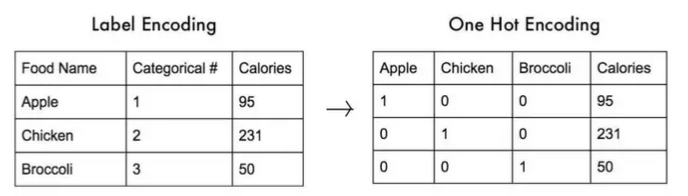

In [ ]:
selectedColumns.head()

,height,sport,sex
0,1.72,athletics,male
1,1.68,fencing,female
2,1.98,athletics,male
3,1.83,taekwondo,male
4,1.81,cycling,male


In [ ]:
# столбец sport - категориальная переменная (не путать с континуальными)
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selectedColumns, columns=['sport'], drop_first=True)

# столбец sex является целевой переменной, удаляем его из Х
del X['sex']

print('Пометили вид спорта спортсмена единичкой.')
X.head()

Пометили вид спорта спортсмена единичкой.


,height,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p>LabelEncoder ставит в соответствие значению пола (женщина, мужчина) 0 и 1 </p>

In [ ]:
selectedColumns.head()

,height,sport,sex
0,1.72,athletics,male
1,1.68,fencing,female
2,1.98,athletics,male
3,1.83,taekwondo,male
4,1.81,cycling,male


In [ ]:
# целевая переменная (столбец sex) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(data['sex'])

LabelEncoder()

In [ ]:
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
le.transform(['male', 'female', 'male']) # пример расшифровки

array([1, 0, 1])

In [ ]:
le.inverse_transform([1, 0, 1])

array(['male', 'female', 'male'], dtype=object)

In [ ]:
# записываем в таргетную переменную y преобразованный столбец sex

y = pd.Series(data=le.transform(data['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

Масштабирование данных (StandartScaler) https://youtu.be/XsuCOfpf8Ic


**Нормализация** - MinMaxScaler() Для каждой фичи x делает:
$$\frac{x_i - min}{max - min}$$
После нормализации признак будет изменяться в диапазоне [0, 1].<br>
Лучше зарекомендовала себя в моделях, которые работают с расстояниями (KNN).

<br>

**Стандартизация** - StandardScaler(). Для каждой фичи х делает:
$$\frac{x - mean}{std}$$
После стандартизации у признака будут mean = 0, std = 1.<br>
Лучше зарекомендовала себя в линейных моделях.

In [ ]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

#### **<p>**Шаг 2 Обучение.


 Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору</p**>**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.index

Int64Index([  36, 7675, 9226, 6362, 7489, 6263,  742, 9503, 7130, 8835,
            ...
            4140, 3530, 4395, 1512, 5240,  648, 1354, 5099, 8195, 6590],
           dtype='int64', length=3258)

In [ ]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([1, 1, 0, 1, 1])

In [ ]:
model.predict(X_test) # получаем массив

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(X_test)

array([[0.35822689, 0.64177311],
       [0.09201149, 0.90798851],
       [0.78014747, 0.21985253],
       ...,
       [0.56289802, 0.43710198],
       [0.70195071, 0.29804929],
       [0.99662148, 0.00337852]])

Метрика accuracy https://youtu.be/CCH-1gJo_z0


<p>Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [ ]:
model.score(X_train, y_train)

0.7984210526315789

In [ ]:
model.score(X_test, y_test)

0.7943523634131369

<p>Итак, на данном этапе мы..</p>
<ul><li>познакомились с понятием логистической регерссии</li>
    <li>научились делать предобработку данных датасета</li>
    <li>посмотрели на практике регрессию "из коробки"</li>
</ul>

### Метод опорных векторов. SVM.


SVM https://youtu.be/efR1C6CvhmE
<p id="4">Алгоритм заключается в переводе исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с максимальным зазором в этом пространстве. Задача - разделить на классы. </p>
<img align=center src="https://wiki.loginom.ru/images/support-vector-machines.svg"  width=600></p>

$$r = y\frac{w^Tx +b}{||w||}$$
Здесь $w$ - это веса, $x$ - признаки.
Данная задача аналитически решается методом множителей Лагранжа.
$$L(w,b;\lambda) = \frac{1}{2}||w||^2 - \sum\limits^{n}_{i=1}\lambda_i(c_i((w \cdot x_i) - b)-1) \rightarrow min_{w,b}max_{\lambda}$$
 где $\lambda_i \geq 0, 1 \leq i \leq n$

<div class="alert alert-info"><h3>Теория. Проблема линейной неразделимости.</h3><p id="5">Возникает проблема линейной неразделимости данных (когда у данных есть выбросы, шум). Если данные линейно неразделимы, то нужно перейти в признаковое пространство большей размерности, где классы уже могут быть разделены линейно.</p>
Записываем скалярное произведение в другом пространстве. </div>Ядра могут быть любые. Примеры:
<ul>
    <li>Полиномиальное ядро $k(x,x') = (x \cdot x')^d$</li>
    <li>Полиномиальное ядро со смещением $k(x,x') = (x \cdot x' + 1)^d$</li>
     <li>Радиальная базисная функция $k(x,x') = exp (-\gamma ||x-x'||^2)$, для $\gamma > 0$</li>
    <li>Радиальная функция Гаусса $k(x,x') = exp \left(-\frac{||x-x'||^2}{2\sigma^2}\right)$</li>
 </ul>
 <img align=center src="https://sun9-17.userapi.com/impg/WED5z6Jq6sM_D2kQduehRYIsoxaK5L3EZIwQvw/QxBRixWCKlA.jpg?size=1234x527&quality=96&proxy=1&sign=94a6398d0d6250781768375641f441f5&type=album"  width=600></p>
 $\text{ }$

In [ ]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(kernel='poly'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

<p>Снова получаем наш скор, для обучающей и тестовой выборок.</p>

In [ ]:
clf.score(X_train, y_train)

0.7717105263157895

In [ ]:
clf.score(X_test, y_test)

0.7744014732965009

<p>Без StandardScaler получаем более худший результат:</p>

In [ ]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
svc.score(X_train, y_train)

0.8010526315789473

In [ ]:
svc.score(X_test, y_test)

0.7937384898710865

### Практика. Задача разделения ирисов Фишера
<p>Рассмотрим последний пример классификации на сегодня. Множественная классификация ирисов Фишера - 3 класса.</p>
<img align=center id="6" src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png"  width=800></p>

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris.target_names # значения таргетных перменных

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names # 4 параметра | sepal - чашелистик, petal - лепесток

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris.data[:,:2] # забираем данные из датасета
Y = iris.target

In [ ]:
model = LogisticRegression()
model2 = SVC()

model.fit(X, Y)
model2.fit(X, Y)

SVC()

In [ ]:
model.score(X, Y)

0.82

In [ ]:
model2.score(X, Y)

0.82

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<p>Вот так разделяет регрессия:</p>

In [ ]:
np.arange(x_min, x_max, h).shape
np.arange(y_min, y_max, h).shape

(171,)

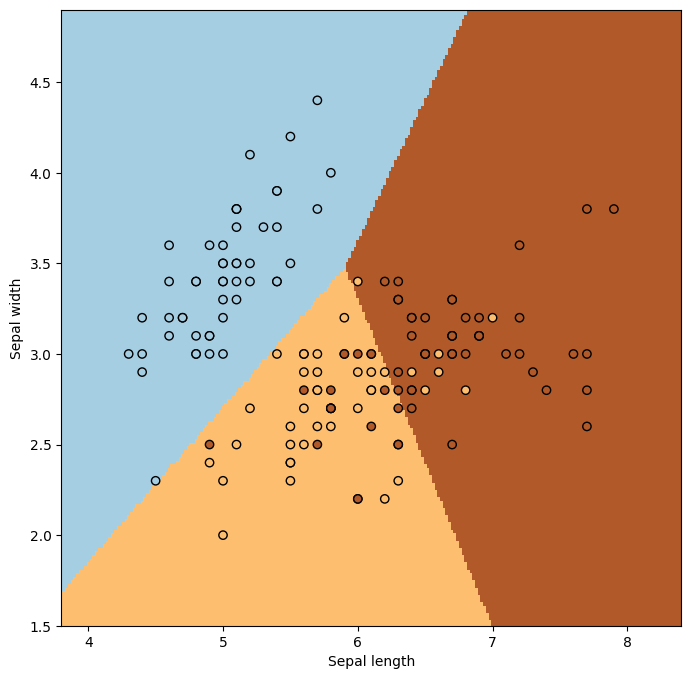

In [ ]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

<p>Теперь SVM</p>

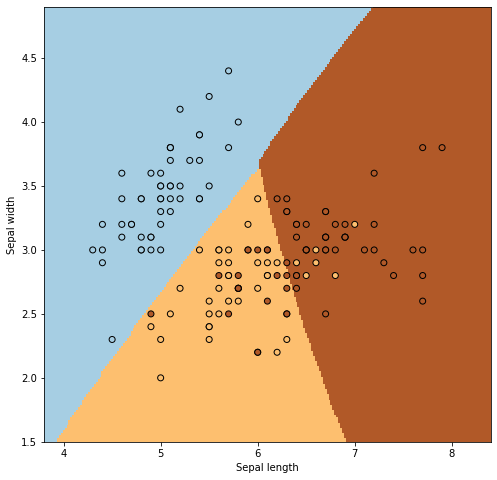

In [ ]:
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

<p>Если хотим нелинейное разделение, то нужно подбирать ядро. Например:</p>

In [ ]:
model2 = SVC(kernel='poly', degree=7)
model2.fit(X, Y)

SVC(degree=7, kernel='poly')

In [ ]:
model2.score(X, Y)

0.8266666666666667

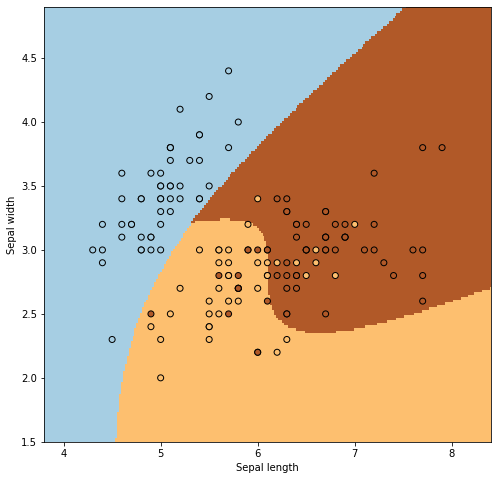

In [ ]:
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

<p><h2>Summary</h2>
<font size="3"><p><ul>
    <li>Логистическая регрессия - это модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой. В данном случае ключевую роль играет сигмоида.</li>
    <ul><li>При работе с логистической регрессией не забываем про редобработку данных: преобразование категориальных переменные в числа, обнуление ячеек датасета, если данные отсутствуют.</li></ul>
    <li>Метод опорных векторов - поиск тем или иным способом разделяющей гиперплоскости между классами.</li>
    <ul><li>При решении данной задачи происходит перевод исходных векторов в пространство более высокой размерности и поиск гиперплоскости с максимальным зазором в этом пространстве. </li>
        <li>Если линейная разделимость невозможна, то подбираем различные ядра для перехода в пр-во большей размерности, где разделение будет уже линейным.</li>
    </ul>


</ul>

</font>
</p>

## **Дополнительные материалы**
1. SVM https://youtu.be/efR1C6CvhmE
2. Типы данных https://youtu.be/c4Cg3TUIH0E
3. Линейные модели классификации и регрессии https://habrahabr.ru/company/ods/blog/323890/
3. Масштабирование данных (StandartScaler) https://youtu.be/XsuCOfpf8Ic
4. Курс «Основы статистики» на Stepik https://stepik.org/course/76/promo
5. Пережёвывая логистическую регрессию https://habr.com/ru/post/485872/
4. Метрика accuracy https://youtu.be/CCH-1gJo_z0
6. Логистическая регрессия https://youtu.be/9BoVCdedvW8
9. Реализация логистической регрессии https://youtu.be/ruVK07YF-RU

<h1>Спасибо за внимание!</h1>